In [1]:
pip install fbprophet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import files
upload = files.upload()

Saving pocm.csv to pocm.csv


In [75]:
data = pd.read_csv("pocm.csv", parse_dates=True)
data.drop("Unnamed: 0", inplace=True, axis=1)
data.columns = ["ds","y"]
data["ds"] = pd.to_datetime(data["ds"])
data.head()

,ds,y
0,2018-12-04,1
1,2018-12-04,1
2,2018-12-05,5
3,2018-12-05,10
4,2018-12-05,20


In [76]:
data.set_index("ds", inplace=True)
data = data.resample("D").mean().dropna()
data["ds"] = data.index

train = data[data["ds"]<="2020-04-30"]
test = data[data["ds"]>="2020-05-01"]
test

,y,ds
ds,,
2020-05-01,9.164634,2020-05-01
2020-05-04,16.536585,2020-05-04
2020-05-05,19.511111,2020-05-05
2020-05-06,13.671642,2020-05-06
2020-05-07,6.770492,2020-05-07
2020-05-08,12.784314,2020-05-08
2020-05-11,7.721910,2020-05-11
2020-05-12,57.050847,2020-05-12
2020-05-13,7.492462,2020-05-13


In [77]:
model = Prophet(daily_seasonality=True)
model.fit(train)
future = model.make_future_dataframe(periods=15,freq="D")
forcast = model.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [78]:
pred = forcast.loc[forcast["ds"]>"2020-04-30", ["ds","yhat"]]
pred

,ds,yhat
459,2020-05-01,11.931446
460,2020-05-02,5.833185
461,2020-05-03,4.899478
462,2020-05-04,11.338587
463,2020-05-05,10.301827
464,2020-05-06,9.592179
465,2020-05-07,9.810672
466,2020-05-08,11.884184
467,2020-05-09,5.785922
468,2020-05-10,4.852215


In [79]:
test.set_index("ds", inplace=True)
# pred.set_index("ds",inplace=True)
# test = test.resample("D").mean().dropna()
test

,y
ds,
2020-05-01,9.164634
2020-05-04,16.536585
2020-05-05,19.511111
2020-05-06,13.671642
2020-05-07,6.770492
2020-05-08,12.784314
2020-05-11,7.721910
2020-05-12,57.050847
2020-05-13,7.492462


In [80]:
pred.drop([460,461,467,468], inplace=True)
pred.set_index("ds", inplace=True)
pred

,yhat
ds,
2020-05-01,11.931446
2020-05-04,11.338587
2020-05-05,10.301827
2020-05-06,9.592179
2020-05-07,9.810672
2020-05-08,11.884184
2020-05-11,11.291324
2020-05-12,10.254564
2020-05-13,9.544916


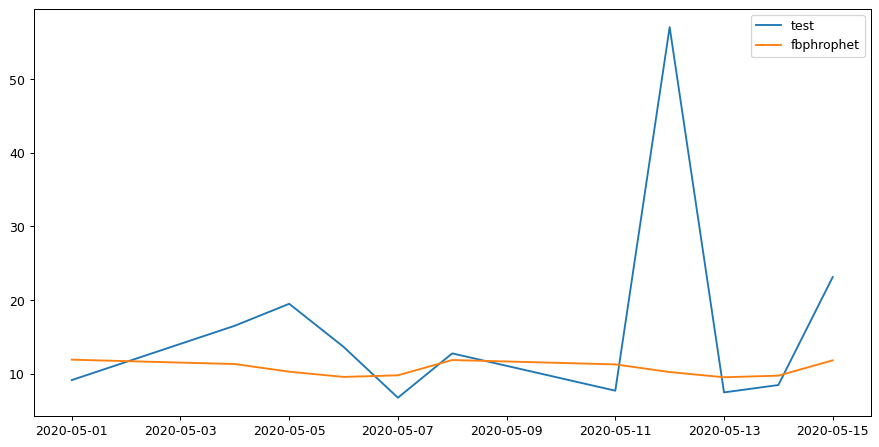

In [81]:
plt.figure(figsize=(12,6),dpi=90)
plt.plot(test['y'], label="test")
plt.plot(pred["yhat"], label="fbphrophet")
plt.legend(loc="best")
plt.show()

In [82]:
up = files.upload()

Saving prediction2.csv to prediction2.csv


In [85]:
prediction = pd.read_csv("prediction2.csv")
prediction.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)
prediction

,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter,SARIMA,ARIMA
0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485,1.739340,4.875819
1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970,6.030019,7.075719
2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510,7.253489,7.032737
3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097,4.496174,5.344488
4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369,9.297053,7.003924
5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632,4.943780,6.950840
6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809,2.155809,5.750632
7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703,16.404137,7.029439
8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288,4.863232,6.936642
9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780,3.031568,6.093867


In [86]:
prediction["FBprophet"] = [i for i in pred["yhat"]]
prediction

,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter,SARIMA,ARIMA,FBprophet
0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485,1.739340,4.875819,11.931446
1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970,6.030019,7.075719,11.338587
2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510,7.253489,7.032737,10.301827
3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097,4.496174,5.344488,9.592179
4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369,9.297053,7.003924,9.810672
5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632,4.943780,6.950840,11.884184
6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809,2.155809,5.750632,11.291324
7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703,16.404137,7.029439,10.254564
8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288,4.863232,6.936642,9.544916
9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780,3.031568,6.093867,9.763409


In [87]:
prediction.to_csv("prediction2.csv")
files.download("prediction2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>